In [1]:
from fastai import *
from fastai.vision import *

import torch
%matplotlib inline

In [2]:
!pwd

/home/jupyter/hkust/math/nbs


In [3]:
data = Path('/home/jupyter/hkust/math/data/mnist.pkl.gz')

In [4]:
with gzip.open(data,'rb') as f:
    ((x_train,y_train), (x_valid, y_valid), _) = pickle.load(f,encoding='latin-1')

In [5]:
x_train.shape, x_valid.shape

((50000, 784), (10000, 784))

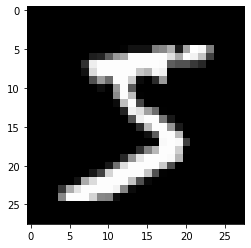

In [6]:
plt.imshow(x_train[0].reshape((28,28)),cmap='gray')

In [7]:
y_train[0]

5

In [8]:
df = pd.DataFrame(data=x_train)

In [9]:
df['label'] = y_train

In [10]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [11]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
count,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,50000.0,50000.0,50000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000354,0.000204,0.000090,0.000071,0.000009,0.0,0.0,0.0,0.0,4.448840
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.015422,0.012079,0.007217,0.007181,0.001483,0.0,0.0,0.0,0.0,2.891296
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.992188,0.988281,0.988281,0.992188,0.242188,0.0,0.0,0.0,0.0,9.000000


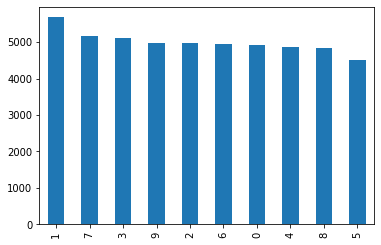

In [12]:
df['label'].value_counts().plot(kind='bar')

# Lets make a baseline of taking the average of perfect numbers

In [13]:
means = []
for i in range(10):
    means.append(np.array(df[df['label'] == i].mean()[:-1]))

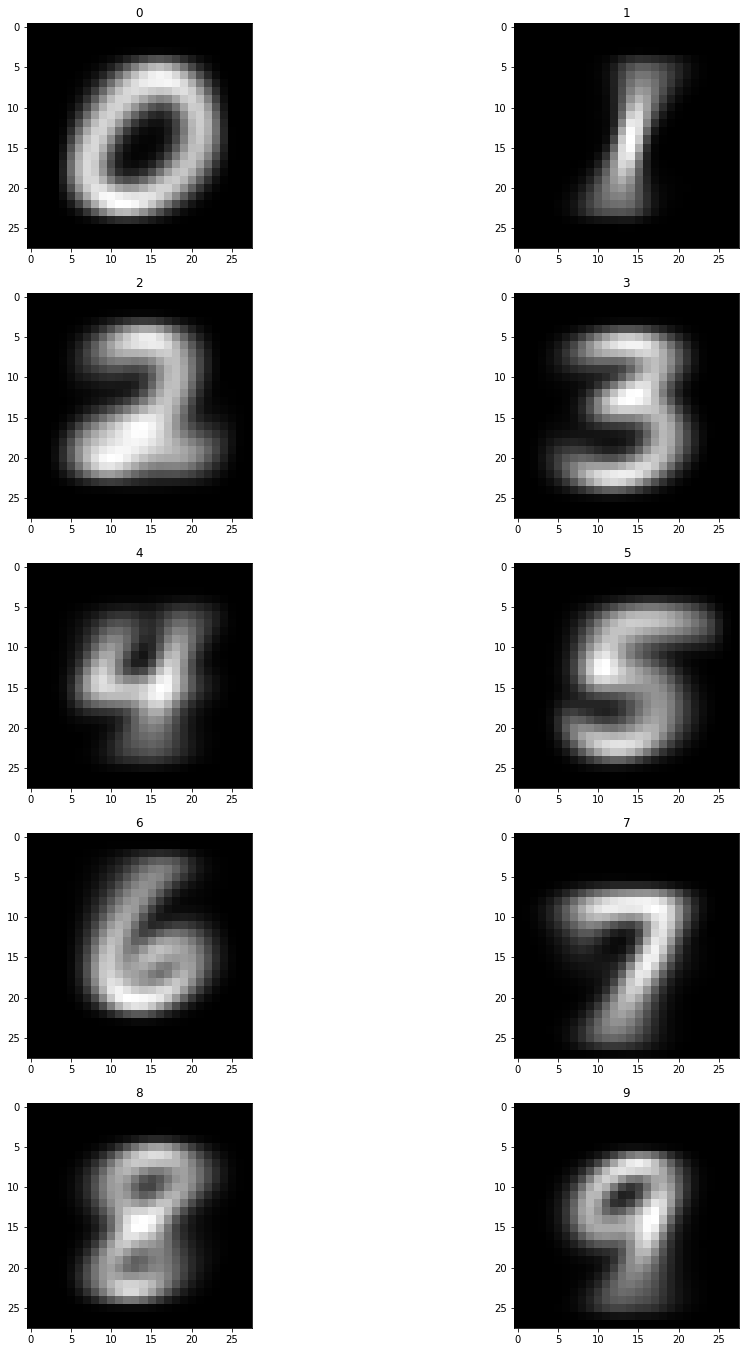

In [14]:
rows = 5
fig, ax = plt.subplots(rows,2,figsize=(16,24))
idx = 0

for i in range(rows):
    img_1 = means[idx].reshape(28,28)
    ax[i][0].set_title(idx)
    ax[i][0].imshow(img_1,cmap='gray')
    idx += 1
    
    img_2 = means[idx].reshape(28,28)
    ax[i][1].set_title(idx)
    ax[i][1].imshow(img_2,cmap='gray')
    idx += 1

In [15]:
means = np.array(means)
means.shape

(10, 784)

In [16]:
means_tensor = torch.from_numpy(means)
means_tensor.shape

torch.Size([10, 784])

In [17]:
x_valid_tensor = torch.tensor(x_valid)
x_valid_tensor.shape

torch.Size([10000, 784])

In [18]:
preds = []
for one_data in x_valid_tensor:
    result = []
    for item in means_tensor:
        result.append((one_data-item.float()).abs().mean())
    preds.append(torch.tensor(result).argmin())

In [19]:
preds = np.array(preds)
preds.shape

(10000,)

In [20]:
(preds == y_valid).mean()

0.6724

# Still Testing

In [19]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(means)

In [25]:
pca1 = pca_result[:,0]
pca2 = pca_result[:,1] 
pca3 = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.293078 0.223018 0.169495]


In [27]:
import seaborn as sns

In [28]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=[pca1,pca2],
    legend="full",
    alpha=0.3
)

AttributeError: 'list' object has no attribute 'get'

<Figure size 1152x720 with 0 Axes>